Preliminary: Installing the updated versions of certain packages

In [1]:
!pip install -U pandas

In [2]:
!pip install -U seaborn

In [3]:
!pip install --user scipy

In [5]:
!pip install --upgrade scikit-learn

In [6]:
!pip install threadpoolctl==3.1.0

Github Repo: https://github.com/ChrisC2022/trip-customer-segmentation

# Identifying the Topic and Goal

**Project Topic and Goal:** Using a database of Tripadvisor reviews for visits to 10 different types of places in Southeast Asia, which unsupervised machine learning methods can best segment, or cluster, users into distinct segments? What do the data say about these clusters, and how might the clusters be used to inform marketing, advertising, and strategic customer segmentation efforts?

**The Data Source:**
The data were donated to UC Irvine Machine Learning Repository on December 18, 2018. The link to the data is available here: https://archive.ics.uci.edu/dataset/484/travel+reviews

Full citation:
Renjith,Shini. (2018). Travel Reviews. UCI Machine Learning Repository. https://doi.org/10.24432/C56K6W.

@misc{misc_travel_reviews_484,

  author       = {Renjith,Shini},
  
  title        = {{Travel Reviews}},
  
  year         = {2018},
  
  howpublished = {UCI Machine Learning Repository},
  
  note         = {{DOI}: https://doi.org/10.24432/C56K6W}
  
}

The data have 980 observations and 10 variables, none of which is explicitly a target variable. Thus this project will make use of unlabeled data to implement multiple unsupervised learning methods.

In [1]:
#Checking the location of the local directory for my Jupyter notebook to download data in the proper place
import os
os.getcwd()

In [9]:
#Importing necessary packages
#import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
file_path = "~\\tripadvisor_review.csv"
trip_data = pd.read_csv(file_path, delimiter=",")

## Cleaning and EDA
***Inspecting the Data***

In [11]:
#Printing the first few rows of the data to have a glimpse of its structure and organization
trip_data.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [5]:
#Summarizing the observations and variable types
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User ID      980 non-null    object 
 1   Category 1   980 non-null    float64
 2   Category 2   980 non-null    float64
 3   Category 3   980 non-null    float64
 4   Category 4   980 non-null    float64
 5   Category 5   980 non-null    float64
 6   Category 6   980 non-null    float64
 7   Category 7   980 non-null    float64
 8   Category 8   980 non-null    float64
 9   Category 9   980 non-null    float64
 10  Category 10  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [6]:
trip_data.iloc[:,1:11].max()

Category 1     3.22
Category 2     3.64
Category 3     3.62
Category 4     3.44
Category 5     3.30
Category 6     3.76
Category 7     3.21
Category 8     3.39
Category 9     3.17
Category 10    3.66
dtype: float64

In [7]:
#Other than the User ID, it looks as though all the variables are reals (float64 datatype).
#I'll examine the minimum, maximum, and mean values to see about the range with which I'll be dealing
#and I'll also keep an eye out for missing values and entries that don't make sense.

#Ignoring the User ID column here and focusing on the variables of interest, which are the average ratings.

trip_data.iloc[:,1:11].max()

Category 1     3.22
Category 2     3.64
Category 3     3.62
Category 4     3.44
Category 5     3.30
Category 6     3.76
Category 7     3.21
Category 8     3.39
Category 9     3.17
Category 10    3.66
dtype: float64

In [8]:
trip_data.iloc[:,1:11].min()

Category 1     0.34
Category 2     0.00
Category 3     0.13
Category 4     0.15
Category 5     0.06
Category 6     0.14
Category 7     3.16
Category 8     2.42
Category 9     0.74
Category 10    2.14
dtype: float64

In [9]:
trip_data.iloc[:,1:11].mean()

Category 1     0.893194
Category 2     1.352612
Category 3     1.013306
Category 4     0.532500
Category 5     0.939735
Category 6     1.842898
Category 7     3.180939
Category 8     2.835061
Category 9     1.569439
Category 10    2.799224
dtype: float64

In [10]:
#The entries above do confirm a range of 0–4 for the ratings, where 4 = Excellent, 3 = Very Good, 2 = Average,
#1 = Poor, and 0= Terrible.

#I will also confirm that there are no missing values:
trip_data.isna().sum()

User ID        0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
dtype: int64

### Exploratory Data Analysis: Visualizations

<Axes: xlabel='Category 10', ylabel='Count'>

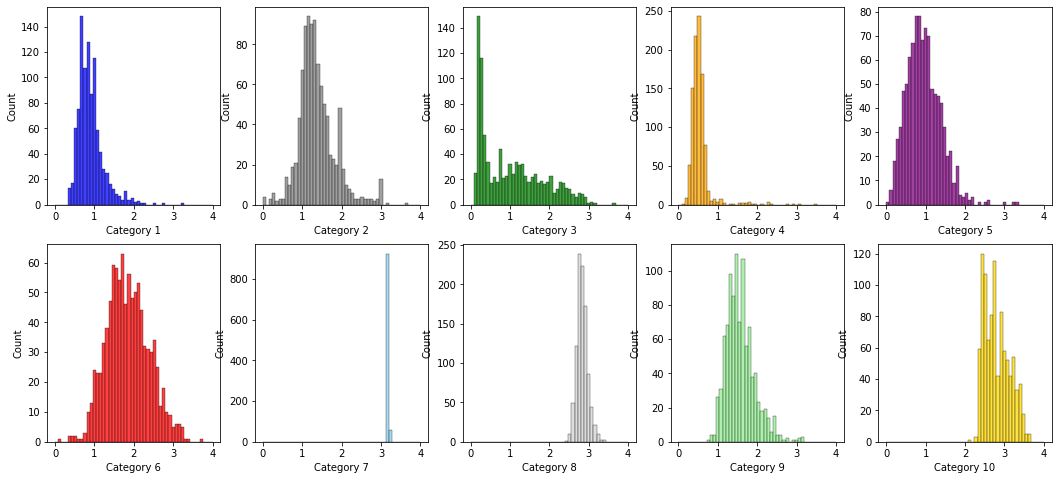

In [11]:
#Now I'd like to see visualize the data from these variables to see whether anything stands out, starting with histograms.
fig, axs = plt.subplots(2, 5, figsize=(18,8))
sns.histplot(data=trip_data, x='Category 1', bins=50, binrange=[0,4], color='blue', ax=axs[0,0])
sns.histplot(data=trip_data, x='Category 2', bins=50, binrange=[0,4], color='gray', ax=axs[0,1])
sns.histplot(data=trip_data, x='Category 3', bins=50, binrange=[0,4], color='green', ax=axs[0,2])
sns.histplot(data=trip_data, x='Category 4', bins=50, binrange=[0,4], color='orange', ax=axs[0,3])
sns.histplot(data=trip_data, x='Category 5', bins=50, binrange=[0,4], color='purple', ax=axs[0,4])
sns.histplot(data=trip_data, x='Category 6', bins=50, binrange=[0,4], color='red', ax=axs[1,0])
sns.histplot(data=trip_data, x='Category 7', bins=50, binrange=[0,4], color='skyblue', ax=axs[1,1])
sns.histplot(data=trip_data, x='Category 8', bins=50, binrange=[0,4], color='lightgray', ax=axs[1,2])
sns.histplot(data=trip_data, x='Category 9', bins=50, binrange=[0,4], color='lightgreen', ax=axs[1,3])
sns.histplot(data=trip_data, x='Category 10', bins=50, binrange=[0,4], color='gold', ax=axs[1,4])

Those histograms are revealing—many of the variables differ widely with respect to the range, concentration, distribution, and frequency of values. There were no missing values; at a first glance the data appear to be relatively clean, although some boxplots could help indicate whether there are outliers that require some investigation and analysis.

<Axes: xlabel='Category 10'>

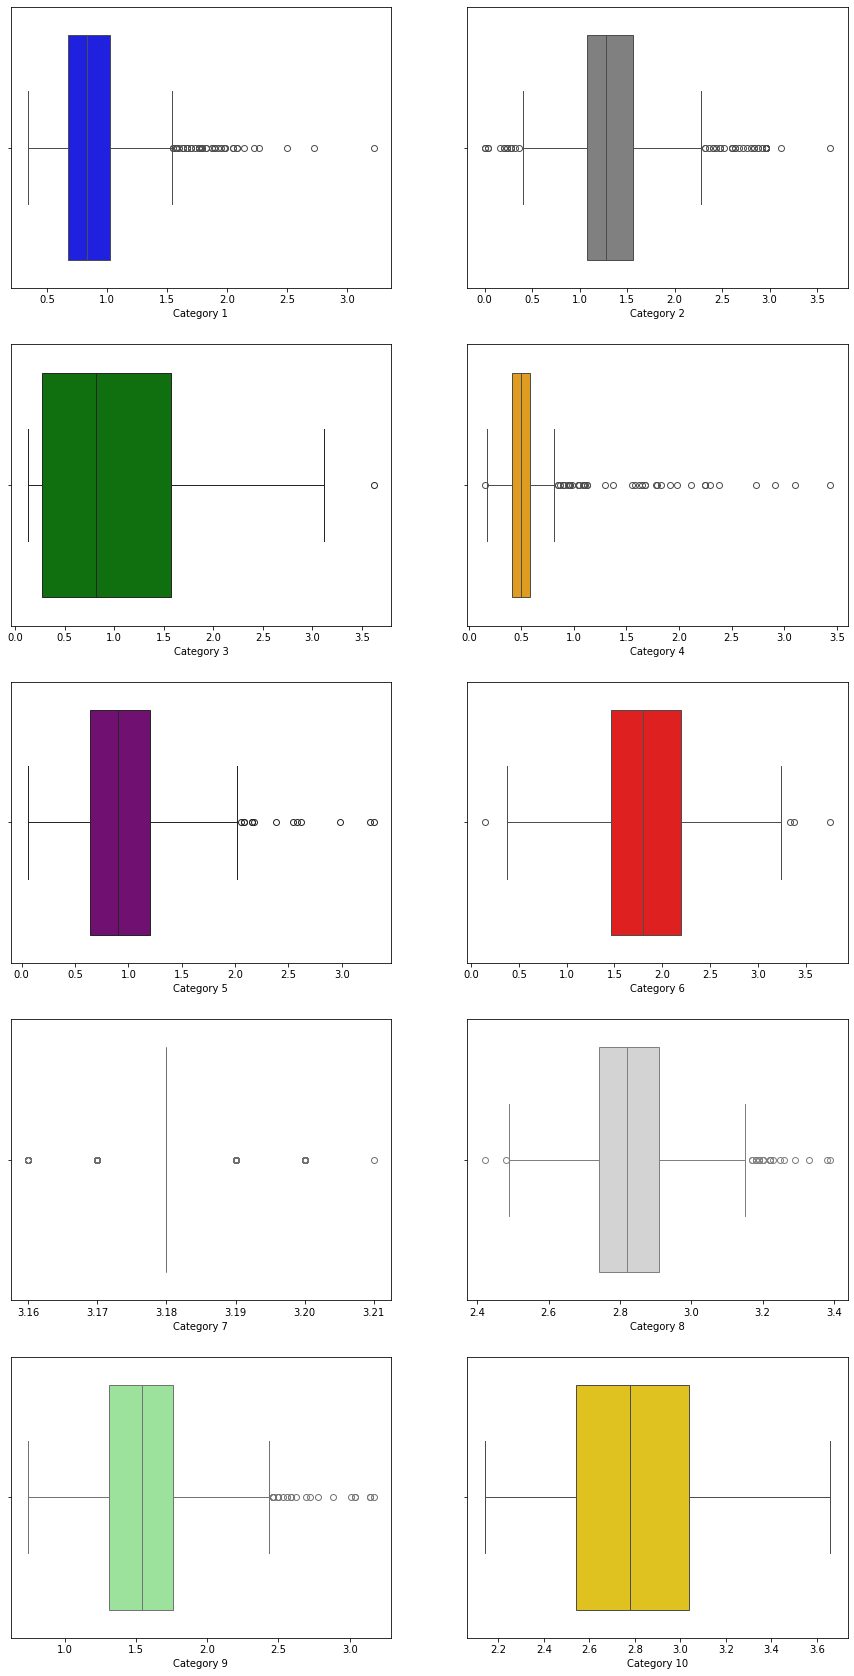

In [12]:
#Boxplots
fig, axs = plt.subplots(5, 2, figsize=(15,30))
sns.boxplot(data=trip_data, x='Category 1', color='blue', ax=axs[0,0])
sns.boxplot(data=trip_data, x='Category 2', color='gray', ax=axs[0,1])
sns.boxplot(data=trip_data, x='Category 3', color='green', ax=axs[1,0])
sns.boxplot(data=trip_data, x='Category 4', color='orange', ax=axs[1,1])
sns.boxplot(data=trip_data, x='Category 5', color='purple', ax=axs[2,0])
sns.boxplot(data=trip_data, x='Category 6', color='red', ax=axs[2,1])
sns.boxplot(data=trip_data, x='Category 7', color='skyblue', ax=axs[3,0])
sns.boxplot(data=trip_data, x='Category 8', color='lightgray', ax=axs[3,1])
sns.boxplot(data=trip_data, x='Category 9', color='lightgreen', ax=axs[4,0])
sns.boxplot(data=trip_data, x='Category 10', color='gold', ax=axs[4,1])

### Priorities for Initial Cleaning and Organization

The data feature some outliers, but an inspection of the numerical values didn't turn up anything immediately problematic. What is most notable is how different some variables are from others; category $7$, in particular, sticks out like a sore thumb. 
So what are the categories? Perhaps the most obvious necessity with respect to data cleaning and munging is to rename the categories so that it is clear what the variables mean; perhaps certain categories of traveler ratings *should* have particular numerical distributions and value ranges, and maybe renaming them will help to guide human intuition here with respect to their interpretations.

In [12]:
'''
Renaming the data columns from the description on the dataset information landing page.
Note that all values are user averages, as this dataset was acquired by the author crawling Tripadvisor and averaging
user ratings for each category.
'''
new_names = ['User ID', 'Art Galleries', 'Dance Clubs', 'Juice Bars', 'Restaurants', 'Museums', 'Resorts', 'Parks/Picnic Spots',
             'Beaches', 'Theaters', 'Religious Institutions']
trip_data.columns = new_names
trip_data.drop(['User ID'], axis=1, inplace=True)
print(trip_data.columns)

Index(['Art Galleries', 'Dance Clubs', 'Juice Bars', 'Restaurants', 'Museums',
       'Resorts', 'Parks/Picnic Spots', 'Beaches', 'Theaters',
       'Religious Institutions'],
      dtype='object')


In [13]:
'''
How strong are the correlations among the variables? Understanding the strength of correlations can help guide us in
understanding underyling relationships that can inform our predictive and analytical choices.
'''
trip_data.corr()

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks/Picnic Spots,Beaches,Theaters,Religious Institutions
Art Galleries,1.000000,-0.187692,0.008613,0.073456,-0.100483,0.094142,-0.012474,0.020029,-0.047313,0.050700
Dance Clubs,-0.187692,1.000000,0.043586,0.131624,0.119631,0.148404,0.110052,-0.158642,0.073342,-0.065762
Juice Bars,0.008613,0.043586,1.000000,0.061128,0.281668,0.356435,0.750651,-0.172953,-0.085435,-0.440543
Restaurants,0.073456,0.131624,0.061128,1.000000,0.101878,0.215866,0.228348,-0.103583,0.026670,-0.352909
Museums,-0.100483,0.119631,0.281668,0.101878,1.000000,0.581306,0.232318,-0.020957,0.041693,-0.247470
Resorts,0.094142,0.148404,0.356435,0.215866,0.581306,1.000000,0.430743,0.000071,0.096410,-0.438104
Parks/Picnic Spots,-0.012474,0.110052,0.750651,0.228348,0.232318,0.430743,1.000000,-0.072492,0.084965,-0.710731
Beaches,0.020029,-0.158642,-0.172953,-0.103583,-0.020957,0.000071,-0.072492,1.000000,0.169695,0.114701
Theaters,-0.047313,0.073342,-0.085435,0.026670,0.041693,0.096410,0.084965,0.169695,1.000000,-0.045682
Religious Institutions,0.050700,-0.065762,-0.440543,-0.352909,-0.247470,-0.438104,-0.710731,0.114701,-0.045682,1.000000


In [15]:
#For additional help in visualizing and making sense of the strengths of any correlations, I'll use a heatmap.

<Axes: >

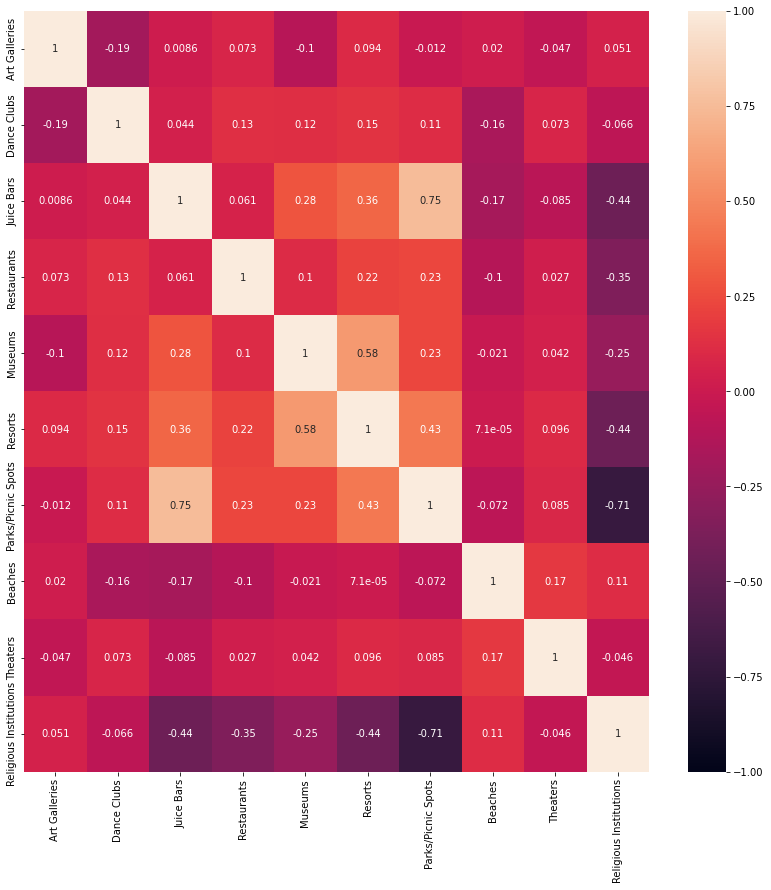

In [14]:
plt.subplots(figsize=(14,14))
sns.heatmap(trip_data.corr(), vmin=-1, vmax=1, annot=True)

**Additional Data Munging to Support the Goal of Clustering: Scaling**

Using this unlabeled data, the first goal is to attempt to cluster it in a meaningful way.
As the utility of certain models may be vulnerable to issues of scale, a follow-on EDA step will involve
preparing the data by scaling it.

In [15]:
#Rescaling the variables
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()

#scaling X
scaling.fit(trip_data)
scaled_X = scaling.transform(trip_data)

print(scaled_X[0:10])

[[ 1.12644655e-01  9.35887028e-01  1.61974970e+00  3.12959857e-01
  -3.19607829e-01  1.07016867e+00  1.15865694e+00 -3.27872241e-01
   6.87517580e-01 -1.18059095e+00]
 [ 3.88088474e-01  1.77264397e+00  2.08917107e+00  3.84493539e-01
   1.09848562e+00  2.47950035e+00  3.71605289e+00 -1.49205628e+00
   7.97274001e-01 -1.49190812e+00]
 [ 1.00018585e+00 -1.15600533e+00 -6.00486509e-01 -8.94171020e-03
  -1.60046643e+00 -5.61689065e-01 -1.20041034e-01 -2.55110738e-01
  -7.11876785e-01 -9.31537215e-01]
 [-1.35638905e+00  9.35887028e-01 -9.17663110e-01  1.34125653e-01
  -1.09727198e+00 -5.98776741e-01 -1.20041034e-01  9.09073305e-01
   1.53994978e-03  1.89204599e-01]
 [-1.17275984e+00 -3.19248390e-01  2.11485590e-01  1.34125653e-01
   1.37295532e+00  3.28415153e-01 -1.20041034e-01 -4.00633743e-01
  -1.06858515e+00 -8.07010347e-01]
 [ 2.96273868e-01 -1.51897001e-01 -3.72119356e-01 -9.38879571e-01
  -4.56842678e-01 -1.08091653e+00 -1.39873901e+00  3.99742786e-01
   2.48491897e-01  2.67974196e+00

## Models

### Model 1: K-Means Clustering

For the first model, we'll use k-means clustering with the goal of determining whether there are groups of users that make sense with respect to their tastes and preferences. These groups, or segments, could then be leveraged for future advertising and marketing campaigns for companies that cater to tourism in Southeast Asia.

In [7]:
#Handling package compatibility issues by installing the necessary packages.
!pip install --user numpy==1.21.5

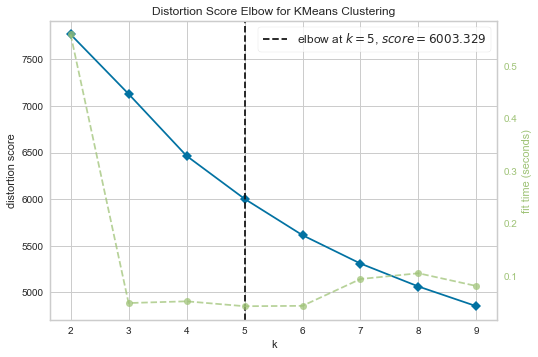

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, n_init=10, random_state=42),
                 k=(2, 10))

In [16]:
'''
Importing the relevant libraries. Also importing KMeans for the next clustering model.

Using the below patch to avoid an attribute error which results from dependencies between numpy (np.float)
and the imported clustering function.
'''
np.float = float

from sklearn.cluster import KMeans

#Using the Elbow Method (and YellowBrick library) to determine the optimal number of clusters
#(https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)
from yellowbrick.cluster import kelbow_visualizer

kelbow_visualizer(KMeans(n_init=10, random_state=42), scaled_X, k=(2,10))

In [17]:
#Based on the above plot, the optimal number of clusters is 5. Using that in the model below:
#from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42).fit(scaled_X)
kmeans.labels_

C:\Users\chcot\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 2, 0, 3, 0, 0, 0, 3, 0, 3, 0, 1, 1, 1, 1, 0, 1, 3, 1, 3, 0,
       0, 0, 3, 1, 1, 3, 0, 1, 1, 1, 1, 3, 0, 0, 0, 0, 1, 2, 0, 0, 0, 3,
       3, 2, 3, 0, 0, 1, 0, 0, 3, 2, 0, 0, 1, 0, 1, 3, 1, 2, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 1, 3, 0, 1, 1, 0, 1, 0, 0, 2, 3, 4, 2, 2, 0, 0, 0,
       4, 0, 2, 0, 1, 1, 1, 2, 1, 3, 1, 3, 3, 0, 1, 0, 2, 1, 3, 0, 2, 3,
       3, 0, 3, 3, 1, 3, 1, 3, 0, 0, 3, 3, 1, 2, 3, 0, 0, 3, 0, 0, 0, 3,
       3, 3, 0, 3, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0,
       0, 0, 3, 2, 1, 0, 0, 0, 3, 0, 0, 0, 1, 3, 1, 0, 3, 2, 0, 0, 0, 3,
       3, 0, 0, 0, 0, 3, 3, 2, 1, 3, 3, 2, 1, 0, 1, 1, 2, 0, 3, 0, 0, 1,
       0, 4, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 3,
       3, 2, 1, 0, 1, 0, 4, 3, 0, 1, 3, 1, 0, 0, 3, 3, 2, 3, 3, 2, 1, 1,
       0, 0, 0, 0, 2, 4, 0, 3, 3, 0, 1, 1, 0, 0, 0, 4, 2, 1, 3, 3, 2, 3,
       0, 1, 1, 1, 0, 3, 0, 0, 1, 1, 4, 0, 3, 3, 0, 3, 0, 3, 1, 3, 0, 0,
       4, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 2, 3, 0,

### Model 2: Hierarchical Clustering

The next clustering method will use hierarchical clustering. 

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
#Using k=5 (as this was used for k-means).
clst_mod = AgglomerativeClustering(n_clusters = 5).fit(scaled_X)
clst_mod.labels_

array([4, 4, 1, 1, 1, 0, 0, 0, 1, 0, 3, 3, 4, 4, 4, 3, 1, 4, 3, 4, 1, 0,
       0, 0, 1, 3, 4, 1, 0, 4, 4, 3, 3, 3, 0, 0, 1, 0, 4, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 3, 4, 0, 4, 3, 1, 0, 0, 4, 1, 4, 3, 4, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 4, 3, 1, 4, 3, 0, 4, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0,
       2, 1, 0, 0, 3, 4, 3, 1, 4, 1, 4, 0, 1, 0, 4, 1, 0, 4, 3, 0, 0, 3,
       4, 1, 3, 1, 4, 0, 4, 0, 0, 1, 3, 3, 3, 1, 3, 1, 1, 1, 0, 0, 1, 3,
       4, 1, 0, 3, 4, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 4, 3, 3, 1, 1, 1, 1,
       1, 0, 0, 0, 3, 1, 1, 0, 3, 0, 1, 1, 4, 0, 4, 0, 3, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 3, 1, 1, 4, 1, 3, 1, 4, 0, 4, 4, 0, 0, 0, 0, 1, 4,
       0, 2, 3, 1, 4, 0, 1, 1, 1, 0, 1, 0, 1, 4, 1, 1, 0, 4, 0, 1, 3, 1,
       3, 1, 3, 0, 4, 0, 2, 1, 3, 4, 0, 4, 1, 1, 3, 0, 1, 1, 3, 1, 4, 3,
       0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 4, 4, 1, 0, 0, 2, 1, 4, 4, 4, 0, 4,
       0, 4, 4, 4, 0, 3, 0, 1, 4, 4, 2, 0, 1, 3, 1, 3, 1, 0, 4, 3, 1, 1,
       2, 0, 0, 0, 4, 0, 1, 0, 0, 1, 0, 4, 1, 4, 0,

### Preliminary Model Comparison

Now to examine the $2$ models side-by-side. The labels $(0$–$4)$ are arbitrary, but what is relevant is comparing how similarly the clustering was performed for each observation (in this case, the users providing ratings).

In [20]:
clst_lab = clst_mod.labels_
clst_uniq, clst_freq = np.unique(clst_lab, return_counts=True)

k_lab = kmeans.labels_
k_uniq, k_freq = np.unique(k_lab, return_counts=True)

print(np.sort(clst_freq))
print(np.sort(k_freq))

[ 21 160 179 299 321]
[ 21  94 209 267 389]


The two methods bear similarities, as can be seen from the totals above, although the distributions of users into groups is not quite even. Let's explore this!

In [21]:
#There are some similarities in the above, given that the labels are agnostic. Let's map them:
print(np.unique(clst_lab, return_index=True))
print(np.unique(k_lab, return_index=True))
cl_labs, cl_ind = np.unique(clst_lab, return_index=True)
k_labs, k_ind = np.unique(k_lab, return_index=True)

(array([0, 1, 2, 3, 4], dtype=int64), array([ 5,  2, 82, 10,  0], dtype=int64))
(array([0, 1, 2, 3, 4]), array([ 3,  0,  2,  4, 82], dtype=int64))


In [22]:
clst_vals = clst_lab[np.sort(cl_ind, axis=0)]
k_vals = k_lab[np.sort(k_ind, axis=0)]

print(clst_vals)
print(k_vals)

[4 1 0 3 2]
[1 2 0 3 4]


In [23]:
new_lab = [k_vals[np.where(clst_vals==val)] for val in clst_lab]
new_lab = np.array(new_lab).flatten()
clst_lab = new_lab
print(clst_lab)

[1 1 2 2 2 0 0 0 2 0 3 3 1 1 1 3 2 1 3 1 2 0 0 0 2 3 1 2 0 1 1 3 3 3 0 0 2
 0 1 2 0 0 2 2 0 0 0 2 3 1 0 1 3 2 0 0 1 2 1 3 1 2 0 0 2 2 2 2 2 2 2 1 3 2
 1 3 0 1 0 0 0 2 4 2 2 0 2 0 4 2 0 0 3 1 3 2 1 2 1 0 2 0 1 2 0 1 3 0 0 3 1
 2 3 2 1 0 1 0 0 2 3 3 3 2 3 2 2 2 0 0 2 3 1 2 0 3 1 2 2 0 0 0 0 0 0 3 3 1
 3 3 2 2 2 2 2 0 0 0 3 2 2 0 3 0 2 2 1 0 1 0 3 2 2 0 2 2 2 0 2 0 0 3 2 2 1
 2 3 2 1 0 1 1 0 0 0 0 2 1 0 4 3 2 1 0 2 2 2 0 2 0 2 1 2 2 0 1 0 2 3 2 3 2
 3 0 1 0 4 2 3 1 0 1 2 2 3 0 2 2 3 2 1 3 0 0 0 0 2 4 0 0 2 0 1 1 2 0 0 4 2
 1 1 1 0 1 0 1 1 1 0 3 0 2 1 1 4 0 2 3 2 3 2 0 1 3 2 2 4 0 0 0 1 0 2 0 0 2
 0 1 2 1 0 1 1 0 2 2 3 1 2 1 0 0 2 3 3 2 1 0 1 0 0 0 2 2 2 1 1 3 2 1 0 2 2
 3 2 2 2 0 3 2 3 1 2 1 0 0 3 0 1 1 2 2 1 0 0 0 2 2 0 2 2 3 3 0 0 3 2 0 2 3
 0 1 4 2 0 1 1 3 2 3 0 0 2 2 0 1 3 2 2 2 1 0 1 2 0 1 2 2 0 2 0 1 0 0 3 3 2
 1 3 1 0 3 3 2 3 1 0 0 0 2 1 2 4 0 2 2 3 0 0 0 2 3 1 3 3 2 0 4 0 2 2 0 2 0
 2 0 3 2 3 3 0 2 2 3 2 2 2 2 1 2 0 0 3 0 2 1 2 0 0 2 1 0 0 2 2 1 2 2 1 3 2
 1 2 1 1 2 0 0 0 2 2 0 0 

Using a confusion matrix to examine differences between the hierarchical and K-Means clusters.

Granted, confusion matrices usually involve an array-of-truth, but using it this way allows a quick and intuitive visualization of differences.

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
conf_mat = confusion_matrix(clst_lab, k_lab)
print(conf_mat)

[[216   0  19  64   0]
 [  4 161   0  14   0]
 [157   9  75  80   0]
 [ 12  39   0 109   0]
 [  0   0   0   0  21]]


The diagonal and surrounding $0s$ confirm the presence of similarities as well as important differences between the $2$ methods. We'll add these clusters back to the dataset to see what we can say about the users based on these clusters.

### Model 3: Spectral Clustering

Hierarchical and k-means clustering are both useful methods for working with numbered clusters that use the distance between clusters as the means for differentiating clusters. Another method is spectral clustering, which also works with numbered clusters and distance (in this case, graph distance, as summarized here: https://www.simplilearn.com/tutorials/scikit-learn-tutorial/sklearn-clustering-methods).

Keeping the number of clusters equal to $5$ (because the next step will be to compare the clusters obtained through each model to see what sort of practical information can be gained for each).

In [26]:
from sklearn.cluster import SpectralClustering

In [27]:
#Using 'cluster-qr' hyperparameter as it directly extracts eigenvectors in clustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)
spctrl = SpectralClustering(n_clusters=5, assign_labels='cluster_qr', random_state=42).fit(scaled_X)
spctrl_lab = spctrl.labels_
spctrl_uniq, spctrl_freq = np.unique(spctrl_lab, return_counts=True)
print(spctrl_uniq, spctrl_freq)
print(np.sort(spctrl_freq))

[0 1 2 3 4] [  2   5  16   3 954]
[  2   3   5  16 954]


These counts look very different, with nearly all values falling into $1$ cluster; this might not be useful for our purposes.

Let's add the new groups to our original data and see what it tells us!

## Conclusions: Results and Analysis

We'll compare the $3$ clustering methods with the goal of differentiating among our groups for the purposes of targeting TripAdvisor users. We'll do this by comparing mean ratings for each of our clusters visually and statistically.

In [28]:
trip_data['K-Means Clusters'] = pd.Categorical(k_lab)
trip_data['Hierarchical Clusters'] = pd.Categorical(clst_lab)
trip_data['Spectral Clusters'] = pd.Categorical(spctrl_lab)

In [50]:
#This function will plot the mean ratings of each TripAdvisor category.
#clst_mthd: 3 = k-means; 2 = hierarchical; 1 = spectral

def plot_means(df, clst_mthd):
    
    #calculating the mean of each column by category
    col_lst = df.columns.tolist()
    main_lst = col_lst[0:(len(col_lst)-3)]
    grp_dt = df[main_lst].groupby(df.iloc[:, -(clst_mthd)]).mean()
    mthd_name = df.iloc[:, -(clst_mthd)].name
    strng = 'Mean Ratings for Each Category, ' + mthd_name
    
    #plotting the means
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    
    plt.figure(figsize=(12.8, 9.6))
    ax = plt.subplot(111)
    from cycler import cycler
    ax.set_prop_cycle(cycler('color', colors))
    ax.plot(grp_dt, marker='o')
    plt.title(strng)
    plt.xticks(np.arange(0, 5, step=1))
    plt.legend(grp_dt.columns.values, loc='upper right')

In [42]:
#Importing stats to enable statistical comparisons
from scipy import stats

In [54]:
#This function prints t-scores and p-values for each cluster comparison
#clst_mthd: 3 = k-means; 2 = hierarchical; 1 = spectral

def two_sided(df, clst_mthd):
    for m in range(0, (len(df.columns)-3)):
        j = 0
        for i in range(0, len(df.columns)):
            j = i + 1
            while j < 5:
                group1 = df[df.iloc[:, -(clst_mthd)] == i]
                group2 = df[df.iloc[:, -(clst_mthd)] == j]
                arr1 = group1.iloc[:, m]
                arr2 = group2.iloc[:, m]
                t, p = stats.ttest_ind(arr1, arr2)
                print(df.iloc[:, m].name, ',', df.iloc[:, -(clst_mthd)].name, i, 
                      'vs.', j, 't-score:', np.round(t, 3), 'p-value:', np.round(p, 3))
                j+=1

### K-Means: Analysis through Visualization and Statistical Comparison

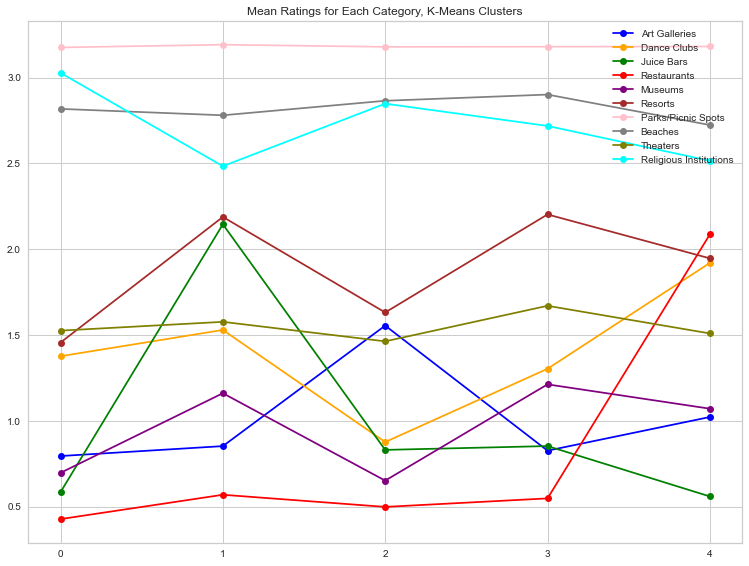

In [51]:
plot_means(trip_data, 3)

In [55]:
#examining two-sided statistical differences between mean ratings by k-means cluster
two_sided(trip_data, 3)

Art Galleries , K-Means Clusters 0 vs. 1 t-score: -3.015 p-value: 0.003
Art Galleries , K-Means Clusters 0 vs. 2 t-score: -26.646 p-value: 0.0
Art Galleries , K-Means Clusters 0 vs. 3 t-score: -1.89 p-value: 0.059
Art Galleries , K-Means Clusters 0 vs. 4 t-score: -4.783 p-value: 0.0
Art Galleries , K-Means Clusters 1 vs. 2 t-score: -18.836 p-value: 0.0
Art Galleries , K-Means Clusters 1 vs. 3 t-score: 1.225 p-value: 0.221
Art Galleries , K-Means Clusters 1 vs. 4 t-score: -2.808 p-value: 0.005
Art Galleries , K-Means Clusters 2 vs. 3 t-score: 22.669 p-value: 0.0
Art Galleries , K-Means Clusters 2 vs. 4 t-score: 5.918 p-value: 0.0
Art Galleries , K-Means Clusters 3 vs. 4 t-score: -3.837 p-value: 0.0
Dance Clubs , K-Means Clusters 0 vs. 1 t-score: -4.12 p-value: 0.0
Dance Clubs , K-Means Clusters 0 vs. 2 t-score: 11.126 p-value: 0.0
Dance Clubs , K-Means Clusters 0 vs. 3 t-score: 2.326 p-value: 0.02
Dance Clubs , K-Means Clusters 0 vs. 4 t-score: -6.214 p-value: 0.0
Dance Clubs , K-Means 

#### K-Means: What the Model Tells Us

Statistical differences abound here. Cluster $0$ has higher means scores for religious institutions and lower scores for resorts and museums. Cluster $1$ has lower mean scores for religious institutions but higher scores for resorts, theaters, and museums. Cluster $2$ is similar to cluster $0$ but gave the highest scores for art galleries, on average, of any cluster. Cluster $3$ is similar to cluster $1$ but has a much lower mean score for theaters. Cluster $4$ bears some similarities to clusters $0$ and $2$ but has a lower mean score for religious institutions, a lower score for art galleries compared to cluster $2$, and much higher scores (compared to all clusters) for restaurants and dance clubs.  

### Hierarchical Clusters: Analysis through Visualization and Statistical Comparison

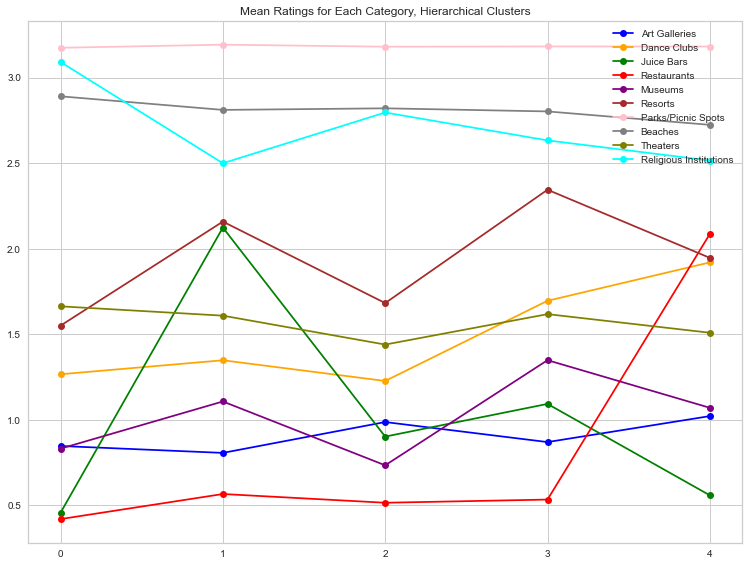

In [52]:
plot_means(trip_data, 2)

In [56]:
#examining two-sided statistical differences between mean ratings by hierarchical cluster
two_sided(trip_data, 2)

Art Galleries , Hierarchical Clusters 0 vs. 1 t-score: 1.581 p-value: 0.114
Art Galleries , Hierarchical Clusters 0 vs. 2 t-score: -4.734 p-value: 0.0
Art Galleries , Hierarchical Clusters 0 vs. 3 t-score: -0.88 p-value: 0.379
Art Galleries , Hierarchical Clusters 0 vs. 4 t-score: -2.569 p-value: 0.011
Art Galleries , Hierarchical Clusters 1 vs. 2 t-score: -5.348 p-value: 0.0
Art Galleries , Hierarchical Clusters 1 vs. 3 t-score: -2.892 p-value: 0.004
Art Galleries , Hierarchical Clusters 1 vs. 4 t-score: -4.091 p-value: 0.0
Art Galleries , Hierarchical Clusters 2 vs. 3 t-score: 3.348 p-value: 0.001
Art Galleries , Hierarchical Clusters 2 vs. 4 t-score: -0.37 p-value: 0.712
Art Galleries , Hierarchical Clusters 3 vs. 4 t-score: -3.138 p-value: 0.002
Dance Clubs , Hierarchical Clusters 0 vs. 1 t-score: -2.737 p-value: 0.006
Dance Clubs , Hierarchical Clusters 0 vs. 2 t-score: 1.314 p-value: 0.189
Dance Clubs , Hierarchical Clusters 0 vs. 3 t-score: -9.628 p-value: 0.0
Dance Clubs , Hier

#### Hierarchical Clusters: What the Model Tells Us

Once again, cluster $0$ has higher means scores for religious institutions; this hierarchical cluster also has lower scores for resorts (once again) and, differently with this model, resorts. Cluster $1$ again has lower mean scores for religious institutions but higher scores for resorts and juice bars. Cluster $2$ is similar to cluster $0$ but had a dampened art gallery rating compared to the k-means cluster. Cluster $3$ had the highest ratings for resorts and museums. Cluster $4$ again had a low mean score for religious institutions and the highest scores (compared to all clusters) for restaurants and dance clubs.

### Spectral Clusters: Analysis through Visualization and Statistical Comparison

Note: Nearly all users fell into $1$ cluster; for this reason, analysis of the spectral clusters will be impractical for strategic purposes as it effectively tells us what we already know about the sample as a whole. This is confirmed $2$ cells below, after running the *two_sided* function; the limited size of $4$ of the $5$ clusters produces an error which suggests limited statistical utility in this case.

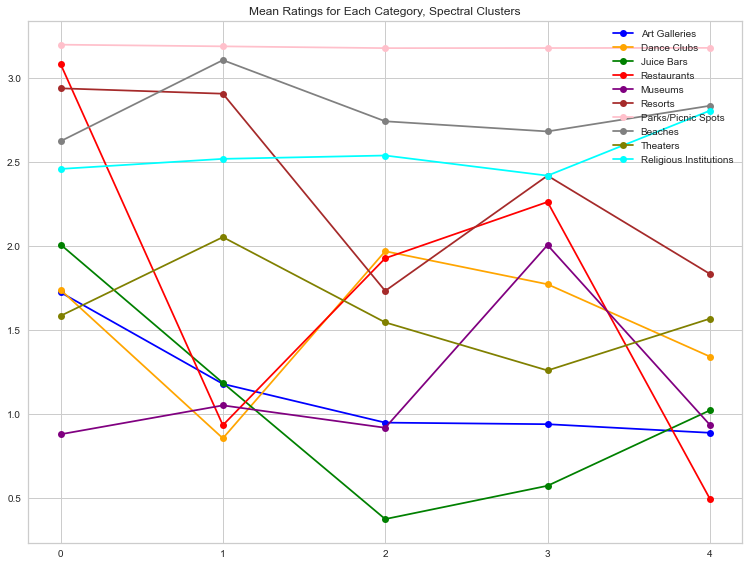

In [53]:
plot_means(trip_data, 1)

In [57]:
#examining two-sided statistical differences between mean ratings by spectral cluster
two_sided(trip_data, 1)

Art Galleries , Spectral Clusters 0 vs. 1 t-score: 3.15 p-value: 0.025
Art Galleries , Spectral Clusters 0 vs. 2 t-score: 3.882 p-value: 0.001
Art Galleries , Spectral Clusters 0 vs. 3 t-score: 4.667 p-value: 0.019
Art Galleries , Spectral Clusters 0 vs. 4 t-score: 3.619 p-value: 0.0
Art Galleries , Spectral Clusters 1 vs. 2 t-score: 1.832 p-value: 0.083
Art Galleries , Spectral Clusters 1 vs. 3 t-score: 2.393 p-value: 0.054
Art Galleries , Spectral Clusters 1 vs. 4 t-score: 1.993 p-value: 0.047
Art Galleries , Spectral Clusters 2 vs. 3 t-score: 0.06 p-value: 0.953
Art Galleries , Spectral Clusters 2 vs. 4 t-score: 0.738 p-value: 0.461
Art Galleries , Spectral Clusters 3 vs. 4 t-score: 0.271 p-value: 0.786
Dance Clubs , Spectral Clusters 0 vs. 1 t-score: 3.263 p-value: 0.022
Dance Clubs , Spectral Clusters 0 vs. 2 t-score: -0.433 p-value: 0.671
Dance Clubs , Spectral Clusters 0 vs. 3 t-score: -0.202 p-value: 0.853
Dance Clubs , Spectral Clusters 0 vs. 4 t-score: 1.204 p-value: 0.229
Da

<ipython-input-54-265776954de7>:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(arr1, arr2)
